In [11]:
# looking at this as classification problem
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm

In [12]:
# Read integrateddata
df =pd.read_parquet('integratedData.parquet.gz')

In [15]:

df.head(2)

,date,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,dead_fuel_moisture_100hr_Percent,dead_fuel_moisture_1000hr_Percent,energy_release_component-g_Unitless,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,fire_occurred,acres_burned,fire_name,longitude,latitude
0,1999-01-01,0.0,40.3,0.00589,138.0,123.0,1.6,293.1,281.1,24.0,16.0,15.5,34.0,1.7,0.74,False,NaN,None,-117.975000,33.566667
1,1999-01-01,0.0,39.8,0.00590,137.2,123.0,1.6,293.1,281.2,24.0,16.0,15.5,35.0,1.7,0.74,False,NaN,None,-117.933333,33.566667


In [16]:
print(df.shape)
df.head()

(6826300, 20)


,date,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,dead_fuel_moisture_100hr_Percent,dead_fuel_moisture_1000hr_Percent,energy_release_component-g_Unitless,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,fire_occurred,acres_burned,fire_name,longitude,latitude
0,1999-01-01,0.0,40.3,0.00589,138.0,123.0,1.6,293.1,281.1,24.0,16.0,15.5,34.0,1.7,0.74,False,NaN,None,-117.975000,33.566667
1,1999-01-01,0.0,39.8,0.00590,137.2,123.0,1.6,293.1,281.2,24.0,16.0,15.5,35.0,1.7,0.74,False,NaN,None,-117.933333,33.566667
2,1999-01-01,0.0,38.2,0.00580,137.2,123.0,1.7,293.2,281.2,26.0,15.2,14.9,37.0,1.7,0.77,False,NaN,None,-117.891667,33.566667
3,1999-01-01,0.0,36.4,0.00567,137.3,49.0,1.8,293.3,280.3,27.0,15.0,14.8,38.0,1.8,0.76,False,NaN,None,-117.850000,33.566667
4,1999-01-01,0.0,33.8,0.00538,137.3,49.0,1.9,293.2,279.9,29.0,13.3,13.6,43.0,1.9,0.80,False,NaN,None,-117.808333,33.566667


In [17]:
# Choose only the data with fire occured 
df['fire_occurred'].unique()

array([False,  True])

In [18]:
# There are 1743 fires occured in this integrated data as gridme represnted of rectangule polygon.
# historical perimeters consist of 176 first. will count on this integrated dataset first then will explor more
dff=df[df['fire_occurred']==True]
dff.head()
print(dff.shape)

(1743, 20)


In [19]:
dff.columns

Index(['date', 'precipitation_amount_mm', 'relative_humidity_%',
       'specific_humidity_kg/kg',
       'surface_downwelling_shortwave_flux_in_air_W m-2',
       'wind_from_direction_Degrees Clockwise from north', 'wind_speed_m/s',
       'max_air_temperature_K', 'min_air_temperature_K',
       'burning_index_g_Unitless', 'dead_fuel_moisture_100hr_Percent',
       'dead_fuel_moisture_1000hr_Percent',
       'energy_release_component-g_Unitless',
       'potential_evapotranspiration_mm', 'mean_vapor_pressure_deficit_kPa',
       'fire_occurred', 'acres_burned', 'fire_name', 'longitude', 'latitude'],
      dtype='object')

In [20]:
# add two more features 
dff['month'] = dff.apply(lambda row: row.date.month, axis = 1)
dff['day']   = dff.apply(lambda row: row.date.day, axis = 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
dff.head()

,date,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,...,energy_release_component-g_Unitless,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,fire_occurred,acres_burned,fire_name,longitude,latitude,month,day
1021229,2001-01-03,0.0,9.9,0.00191,147.2,37.0,4.4,297.0,281.2,68.0,...,72.0,4.8,1.73,True,10438.019531,VIEJAS,-116.766667,32.816667,1,3
1021230,2001-01-03,0.0,9.8,0.00195,145.1,54.0,4.9,295.2,280.8,76.0,...,77.0,4.8,1.56,True,10438.019531,VIEJAS,-116.725000,32.816667,1,3
1021231,2001-01-03,0.0,10.1,0.00180,142.9,54.0,5.4,294.1,279.8,83.0,...,81.0,4.9,1.46,True,10438.019531,VIEJAS,-116.683333,32.816667,1,3
1021275,2001-01-03,0.0,9.5,0.00209,149.7,37.0,3.7,298.7,280.4,54.0,...,61.0,4.6,1.82,True,10438.019531,VIEJAS,-116.850000,32.775000,1,3
1021276,2001-01-03,0.0,9.5,0.00199,149.3,37.0,3.9,297.7,280.3,58.0,...,65.0,4.5,1.75,True,10438.019531,VIEJAS,-116.808333,32.775000,1,3


In [22]:
# as we are examing the severity , remove data,fire name and fire occured and include day & month features 
dfc=dff.drop(['date','fire_name', 'fire_occurred'], axis=1)
dfc.head()

,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,dead_fuel_moisture_100hr_Percent,dead_fuel_moisture_1000hr_Percent,energy_release_component-g_Unitless,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,acres_burned,longitude,latitude,month,day
1021229,0.0,9.9,0.00191,147.2,37.0,4.4,297.0,281.2,68.0,6.9,9.5,72.0,4.8,1.73,10438.019531,-116.766667,32.816667,1,3
1021230,0.0,9.8,0.00195,145.1,54.0,4.9,295.2,280.8,76.0,6.3,8.6,77.0,4.8,1.56,10438.019531,-116.725000,32.816667,1,3
1021231,0.0,10.1,0.00180,142.9,54.0,5.4,294.1,279.8,83.0,5.9,7.9,81.0,4.9,1.46,10438.019531,-116.683333,32.816667,1,3
1021275,0.0,9.5,0.00209,149.7,37.0,3.7,298.7,280.4,54.0,9.3,11.3,61.0,4.6,1.82,10438.019531,-116.850000,32.775000,1,3
1021276,0.0,9.5,0.00199,149.3,37.0,3.9,297.7,280.3,58.0,8.4,10.6,65.0,4.5,1.75,10438.019531,-116.808333,32.775000,1,3


In [23]:
ff=dfc.columns.values
ff

array(['precipitation_amount_mm', 'relative_humidity_%',
       'specific_humidity_kg/kg',
       'surface_downwelling_shortwave_flux_in_air_W m-2',
       'wind_from_direction_Degrees Clockwise from north',
       'wind_speed_m/s', 'max_air_temperature_K', 'min_air_temperature_K',
       'burning_index_g_Unitless', 'dead_fuel_moisture_100hr_Percent',
       'dead_fuel_moisture_1000hr_Percent',
       'energy_release_component-g_Unitless',
       'potential_evapotranspiration_mm',
       'mean_vapor_pressure_deficit_kPa', 'acres_burned', 'longitude',
       'latitude', 'month', 'day'], dtype=object)

In [24]:
# As mentioned early , there are a total of 1743 fires in the integrated data.
# we divide  the data based on  acres burnedas a measure of high fire risk to small (1058 to 40000), medium (40000 to 100000) 
# and large fire ( above 100000)
dfm=dfc 
c0=dfm['acres_burned']>1058
c1=dfm['acres_burned'] <=40000
c2=dfm['acres_burned'] >40000
c3 = dfm['acres_burned'] <=100000
c4 =dfm['acres_burned'] > 100000
# c5=dfm['acres_burned'] <= 85468
# c6=dfm['acres_burned'] >85468
# c7=dfm['acres_burned'] <= 163000
# c8=dfm['acres_burned'] >163000
dfm1= dfm[c0 & c1]
dfm2=dfm[c2 & c3]
dfm3=dfm[c4]
#dfm_4 =dfm[c6 & c7]
#dfm_4 =dfm[c8]

In [25]:
print(dfm1.count()[1])
print(dfm2.count()[1])
print(dfm3.count()[1])

670
414
659


In [26]:
dfm1['label'] = 0
dfm2['label'] = 1
dfm3['label'] = 2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [27]:
# concating all these parts (small, medium and large) and label them to 0,1,2
dfmt=pd.concat([dfm1, dfm2,dfm3])
dfmt.head()

,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,dead_fuel_moisture_100hr_Percent,dead_fuel_moisture_1000hr_Percent,energy_release_component-g_Unitless,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,acres_burned,longitude,latitude,month,day,label
1021229,0.0,9.9,0.00191,147.2,37.0,4.4,297.0,281.2,68.0,6.9,9.5,72.0,4.8,1.73,10438.019531,-116.766667,32.816667,1,3,0
1021230,0.0,9.8,0.00195,145.1,54.0,4.9,295.2,280.8,76.0,6.3,8.6,77.0,4.8,1.56,10438.019531,-116.725000,32.816667,1,3,0
1021231,0.0,10.1,0.00180,142.9,54.0,5.4,294.1,279.8,83.0,5.9,7.9,81.0,4.9,1.46,10438.019531,-116.683333,32.816667,1,3,0
1021275,0.0,9.5,0.00209,149.7,37.0,3.7,298.7,280.4,54.0,9.3,11.3,61.0,4.6,1.82,10438.019531,-116.850000,32.775000,1,3,0
1021276,0.0,9.5,0.00199,149.3,37.0,3.9,297.7,280.3,58.0,8.4,10.6,65.0,4.5,1.75,10438.019531,-116.808333,32.775000,1,3,0


In [28]:
target =dfmt['acres_burned']

In [29]:
y=dfmt['label'].values
y


array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [30]:
x=dfmt.drop(['label','acres_burned'], axis=1)



In [31]:
x.head()


,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,dead_fuel_moisture_100hr_Percent,dead_fuel_moisture_1000hr_Percent,energy_release_component-g_Unitless,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,longitude,latitude,month,day
1021229,0.0,9.9,0.00191,147.2,37.0,4.4,297.0,281.2,68.0,6.9,9.5,72.0,4.8,1.73,-116.766667,32.816667,1,3
1021230,0.0,9.8,0.00195,145.1,54.0,4.9,295.2,280.8,76.0,6.3,8.6,77.0,4.8,1.56,-116.725000,32.816667,1,3
1021231,0.0,10.1,0.00180,142.9,54.0,5.4,294.1,279.8,83.0,5.9,7.9,81.0,4.9,1.46,-116.683333,32.816667,1,3
1021275,0.0,9.5,0.00209,149.7,37.0,3.7,298.7,280.4,54.0,9.3,11.3,61.0,4.6,1.82,-116.850000,32.775000,1,3
1021276,0.0,9.5,0.00199,149.3,37.0,3.9,297.7,280.3,58.0,8.4,10.6,65.0,4.5,1.75,-116.808333,32.775000,1,3


In [32]:
x= x.values

In [33]:
encoded_Y =y

In [34]:
encoded_Y

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [35]:
features =x
labels =y

In [36]:
labels

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [40]:
# First look again to the regression problem and choose inner_cs with kfold 
# this helps with tuning parameters and use mean absolute error 
from sklearn import metrics
from sklearn.model_selection import KFold
# To be used within GridSearch (15 in your case) and shuffle to True
inner_cv = KFold(n_splits=15, shuffle=True, random_state=10)
#As alwasy randomforestregressor perfomrs better , tryig to get best parameter for randomforestclassfier 
from sklearn.model_selection import train_test_split
x_train1, x_valid1, y_train1, y_valid1 = train_test_split(x, y, test_size=0.3, random_state=50)
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# parameters = {'n_estimators': [50,100, 200, 300, 1000], 'max_depth' : [5,10,15,20,25],'min_samples_split':[2,6,8], 
#     'min_samples_leaf':[1,7,9,13],'random_state' : [5,20,25,30,35,40] }
parameters = {'n_estimators': [50,100, 200], 'max_depth' : [15,20,25,30],'min_samples_split':[2,4,6], 
    'min_samples_leaf':[1,7],'random_state' : [5,20,25] }
clf1 =  RandomForestRegressor()
CV_rfc1 = GridSearchCV(clf1 , parameters,scoring= 'neg_mean_absolute_error', cv=inner_cv)
CV_rfc1.fit(x_train1, y_train1)
# y_pred = clf.predict(X_test)
# clf1.fit(x_train1, y_train1)sa 
y_pred1=CV_rfc1.predict(x_valid1)
#accuracy = np.sum(y_pred == y_test)/len(y_test)
#accuracy = accuracy_score(y_pred1, y_valid1)
#cross_val_score(model, features, labels, scoring='accuracy', cv=CV)



In [41]:
# it shows the best paramteres based on gridsearchCV 
# use mean aboulte error for validation accuracy 
vaild_acc = mean_absolute_error(y_valid1, y_pred1)
#print ('Test accuracy = ' + str(accuracy))# + ' at alpha = ' + str(alpha))
print ('Valid accuracy = ' + str(vaild_acc)) 
print (CV_rfc1.best_params_)

Valid accuracy = 0.029388145315487574
{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 20}


In [44]:
# Mean squred error
vaild_acc_mse = metrics.mean_squared_error(y_valid1, y_pred1)
#print ('Test accuracy = ' + str(accuracy))# + ' at alpha = ' + str(alpha))
print ('Valid accuracy_mse = ' + str(vaild_acc_mse)) 


Valid accuracy_mse = 0.024001338432122373


In [45]:
# Mean squred log error
vaild_acc_mlog = metrics.mean_squared_log_error(y_valid1, y_pred1)
#print ('Test accuracy = ' + str(accuracy))# + ' at alpha = ' + str(alpha))
print ('Valid accuracy_mlog = ' + str(vaild_acc_mlog)) 

Valid accuracy_mlog = 0.008362818815885742


In [46]:
# Median absolute error
vaild_acc_mar = metrics.median_absolute_error(y_valid1, y_pred1)
#print ('Test accuracy = ' + str(accuracy))# + ' at alpha = ' + str(alpha))
print ('Valid accuracy_mar = ' + str(vaild_acc_mar)) 

Valid accuracy_mar = 0.0


In [47]:

vaild_acc_medianar = metrics.median_absolute_error(y_valid1, y_pred1)
#print ('Test accuracy = ' + str(accuracy))# + ' at alpha = ' + str(alpha))
print ('Valid accuracy_medianar = ' + str(vaild_acc_medianar)) 


Valid accuracy_medianar = 0.0


In [48]:
# R2 score
vaild_acc_r2 = metrics.r2_score(y_valid1, y_pred1)
#print ('Test accuracy = ' + str(accuracy))# + ' at alpha = ' + str(alpha))
print ('Valid accuracy_r2 = ' + str(vaild_acc_r2)) 


Valid accuracy_r2 = 0.9693785175891116


In [52]:
# Validation accuracy variance score
vaild_acc_vc= metrics.explained_variance_score(y_valid1, y_pred1)
#print ('Test accuracy = ' + str(accuracy))# + ' at alpha = ' + str(alpha))
print ('Valid accuracy_vc = ' + str(vaild_acc_vc)) 


Valid accuracy_vc = 0.9694611882795228


In [53]:
# Max error accuracy
vaild_acc_me = metrics.max_error(y_valid1, y_pred1)
#print ('Test accuracy = ' + str(accuracy))# + ' at alpha = ' + str(alpha))
print ('Valid accuracy_me = ' + str(vaild_acc_me)) 


Valid accuracy_me = 1.69


In [82]:
# Looked at the classification problem (small, medium and large) and use Kfolds with suffle enabled
# Use F1_micro accuracy and get 99% accuracy 
from sklearn.model_selection import KFold
# To be used within GridSearch (5 in your case)
inner_cv = KFold(n_splits=10, shuffle=True, random_state=7)

# To be used in outer CV (you asked for 10)
outer_cv = KFold(n_splits=10, shuffle=True, random_state=7)

from sklearn import metrics
#As alwasy randomforestregressor perfomrs better , tryig to get best parameter for randomforestclassfier 
from sklearn.model_selection import train_test_split
x_train1, x_valid1, y_train1, y_valid1 = train_test_split(x, y, test_size=0.3, random_state=50)
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# parameters = {'n_estimators': [50,100, 200, 300, 1000], 'max_depth' : [5,10,15,20,25],'min_samples_split':[2,6,8], 
#     'min_samples_leaf':[1,7,9,13],'random_state' : [5,20,25,30,35,40] }
parameters = {'n_estimators': [50,100, 200], 'max_depth' : [15,20,25,30],'min_samples_split':[2,4,6], 
    'min_samples_leaf':[1,7],'random_state' : [5,20,25] }
clf1 = RandomForestClassifier(criterion='gini')
CV_rfc1 = GridSearchCV(clf1 , parameters,scoring= 'f1_micro', cv = inner_cv)
CV_rfc1.fit(x_train1, y_train1)
# y_pred = clf.predict(X_test)
# clf1.fit(x_train1, y_train1)sa 
y_pred1=CV_rfc1.predict(x_valid1)
#accuracy = np.sum(y_pred == y_test)/len(y_test)
#accuracy = accuracy_score(y_pred1, y_valid1)
#cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
vaild_acc = metrics.f1_score(y_valid1, y_pred1, average='micro')
#print ('Test accuracy = ' + str(accuracy))# + ' at alpha = ' + str(alpha))
print ('Valid accuracy = ' + str(vaild_acc)) 
print (CV_rfc1.best_params_)


# Validation accuracy 

Valid accuracy = 0.9904397705544933
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 50, 'random_state': 25}


In [83]:
# Classifciation report 
from sklearn.metrics import classification_report
vaild_acc2 = classification_report(y_valid1, y_pred1)
#print ('Test accuracy = ' + str(accuracy))# + ' at alpha = ' + str(alpha))
print ('Valid accuracy = ' + str(vaild_acc2)) 

Valid accuracy =               precision    recall  f1-score   support

           0       1.00      0.99      1.00       208
           1       0.97      1.00      0.99       113
           2       0.99      0.99      0.99       202

    accuracy                           0.99       523
   macro avg       0.99      0.99      0.99       523
weighted avg       0.99      0.99      0.99       523



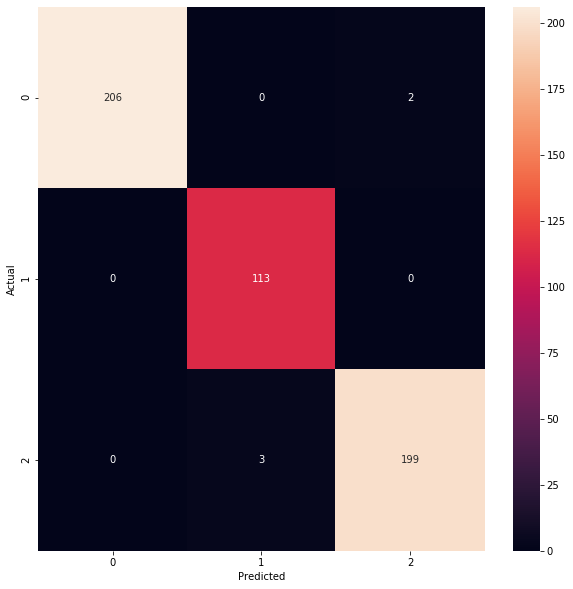

In [84]:
# Confusion matrix 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_valid1, y_pred1)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
with CV=30
RandomForestClassifier(n_estimators=50, max_depth=20, random_state=5, min_samples_split = 2,  min_samples_leaf=1 )

with cv=10
RandomForestClassifier(n_estimators=100, max_depth=15, random_state=5, min_samples_split = 2,  min_samples_leaf=1 )



In [ ]:
from xgboost.sklearn import XGBRegressor
xg_reg1 = XGBRegressor(objective ='reg:linear')
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [ .07,.09,.1], #so called `eta` value
              'max_depth': [7,9,12],
              'min_child_weight': [4,8,12],
              'silent': [1],
              'subsample': [0.7,0.9],
              'colsample_bytree': [0.7,0.9],
              'n_estimators': [500]}

xgb_grid2 = GridSearchCV(xg_reg1,
                        parameters,
                        cv = 2,
                        verbose=True)

xgb_grid2.fit(x_train2, y_train2)
y_pred2=xgb_grid2.predict(x_valid2)
vaild_acc2 = mean_absolute_error(y_valid2, y_pred2)
print ('Valid accuracy = ' + str(vaild_acc2)) 
print (xgb_grid2 .best_params_)

In [27]:
features=x
labels =y

In [29]:
# thinks about normizalied all features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
#features = scaler.fit_transform(features)

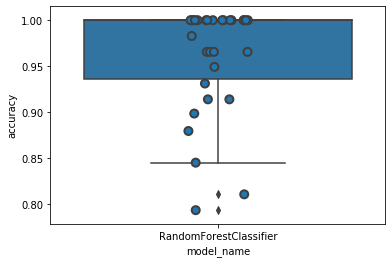

In [74]:
# Use 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=5, min_samples_split = 2,  min_samples_leaf=1 )

CV = 30
model_name = 'RandomForestClassifier'
entries=[]
accuracies = cross_val_score(model, features, labels, scoring='f1_micro', cv=CV)
for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()


model_name
RandomForestClassifier    0.959283
Name: accuracy, dtype: float64

Text(0.5, 0, 'CV folders')

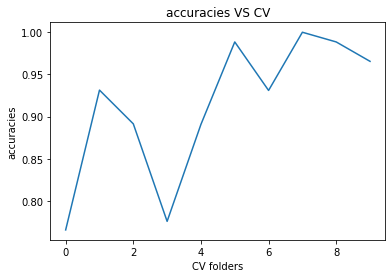

In [67]:
plt.plot(range(CV),accuracies)
plt.ylabel('accuracies') 
plt.title('accuracies VS CV') 
plt.xlabel('CV folders') 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
model = CV_rfc1
model_name = 'RandomForestClassifier'
entries=[]
accuracies = cross_val_score(model, features, labels, scoring='f1_micro', cv=outer_cv)
for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()
cv_df.groupby('model_name').accuracy.mean()